# Logistic Regression

## Binary Classification
In linear regression we get a continuos real values output giving over the whole range of input which is useful for application like prediction of real valued output such as prices of house or stocks but these real valued output are not useful when it comes to get the probability of a particular set of features.

Logistic regression is thus used to get probability of getting a class based on the whether a feature set belongs to a particular class or not.

In logistic regression we take the output of linear regression and feed it as a input to logit ffunction which gives a real valued output in range of [0-1]. This can be thought of as probability of the feature either being 0 class or 1 class.

Logistic function: 
![Image of logistic Function](https://analyticsdefined.com/wp-content/uploads/2017/10/sigmoid-function1.gif)

Logistic Regression is when we feed in the linear regression to logistic function:

![Image of Logistic regression](http://faculty.cas.usf.edu/mbrannick/regression/gifs/lo3.gif)

### Application: Spam Filtering

Our first problem is a modern version of the canonical binary classification problem: spam classification. In our version, however, we will classify spam and ham SMS messages rather than e-mail. We will extract TF-IDF features and classify the messages using logistic regression.

In [48]:
import pandas as pd
import numpy as np

df = pd.read_csv('SMSSpamCollection', delimiter='\t', names=['Class', 'Msg'])
#notice the delimiter option here
#default delimiter used is ',' but in the dataset \t is used as separator
df = df[['Msg', 'Class']]
df['Msg'] = df['Msg'].apply(lambda x: x.strip())
print df.head()
print 'Total Ham: ',df[df['Class']=='ham']['Class'].count()
print 'Toatl Spam: ',df[df['Class']=='spam']['Class'].count()

                                                 Msg Class
0  Go until jurong point, crazy.. Available only ...   ham
1                      Ok lar... Joking wif u oni...   ham
2  Free entry in 2 a wkly comp to win FA Cup fina...  spam
3  U dun say so early hor... U c already then say...   ham
4  Nah I don't think he goes to usf, he lives aro...   ham
Total Ham:  4825
Toatl Spam:  747


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['Msg'], df['Class'])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
clf = LogisticRegression()
clf.fit(X_train, y_train)
prediction = [ clf.predict(i)[0] for i in X_test]

In [50]:
predicted = []
print len(prediction)
for i, output in enumerate(prediction):
    predicted.append('Prediction: %s. Message: %s' % (output, X_test_raw.iloc[i]))

1393


In [51]:
for i in range(5):
    print predicted[i]

Prediction: ham. Message: Daddy, shu shu is looking 4 u... U wan me 2 tell him u're not in singapore or wat?
Prediction: ham. Message: Good afternoon on this glorious anniversary day, my sweet J !! I hope this finds you happy and content, my Prey. I think of you and send a teasing kiss from across the sea coaxing images of fond souveniers ... You Cougar-Pen
Prediction: ham. Message: Ok. C u then.
Prediction: ham. Message: Ya they are well and fine., BBD(pooja) full pimples..even she become quite black..and ur rite here its too cold, wearing sweatter..
Prediction: ham. Message: He says hi and to get your ass back to south tampa (preferably at a kegger)


## Binary classification performance metrics

A variety of metrics exist to evaluate the performance of binary classifiers against trusted labels. The most common metrics are accuracy, precision, recall, F1 measure,and ROC AUC score. All of these measures depend on the concepts of true positives, true negatives, false positives, and false negatives. Positive and negative refer to the classes. True and false denote whether the predicted class is the same as the true class.

For our SMS spam classifier, a true positive prediction is when the classifier correctly predicts that a message is spam. A true negative prediction is when the classifier correctly predicts that a message is ham. A prediction that a ham message is spam is a false positive prediction, and a spam message incorrectly classified as ham is a
false negative prediction.

### Confusion Matrix

A **confusion matrix**, or **contingency table**, can be used to visualize true and false positives and negatives. 

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print confusion_matrix

[[1213    1]
 [  31  148]]


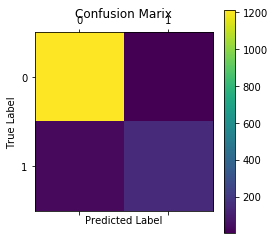

In [58]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix)
plt.title('Confusion Marix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Accuracy
Accuracy measures a fraction of the classifier's predictions that are correct.
scikit-learn provides `accuracy_score` to calculate the accuracy of a set of predictions given the correct labels

In [54]:
from sklearn.metrics import accuracy_score
print 'Accuracy: ', accuracy_score(y_test, prediction)

Accuracy:  0.977027997128


`cross_val_score` predicts and scores labels for a test set using accuracy:

In [55]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)
print scores.mean(), 'Scores of 5 folds: ', scores

0.91314778153 Scores of 5 folds:  [ 0.89964158  0.90681004  0.91756272  0.92114695  0.92057762]


`LogisticRegression.score()` predicts and scores labels for a test set using accuracy:

In [56]:
clf.score(X_test, y_test)

0.97702799712849964

**Accuracy is not an informative metric if the proportions of
the classes are skewed in the number**. For example, a classifier that predicts whether or not credit card transactions are fraudulent may be more sensitive to false negatives than to false positives. To promote customer satisfaction, the credit card company may prefer to risk verifying legitimate transactions than risk ignoring a fraudulent transaction. Because most transactions are legitimate, accuracy is not an appropriate metric for this problem. A classifier that always predicts that transactions are legitimate could have a high accuracy score, but would not be useful. For these reasons, classifiers are often evaluated using two additional measures called precision and recall.

### Precision and Recall

#### Precision
Precision is the ratio of true positives over sum true positives and false positive

Precision can be thought of as the accuracy of the actual correct label out of all the classified labels as true.

![Image of Precision formula](http://www.murase.m.is.nagoya-u.ac.jp/KSCGR/images/eval1.png)

#### Recall
Sometimes called sensitivity in medical domains, recall is the fraction of the truly positive instances that the classifier recognizes. A recall score of one indicates that the classifier did not make any false negative predictions.

![Image of Recall Formula](http://www.murase.m.is.nagoya-u.ac.jp/KSCGR/images/eval2.png)

In scikit-learn cross_val_score has both the scoring methods which can be used by setting attribute `scoring= 'precision'` or `scoring ='recall'`.


*To compute the recall and precision, the data has to be indeed binarized.
Labels didn't have to binarize the data when you want to calculate the accuracy as the accuracy formula doesn't really need information about which class is considered as positive or negative: (TP + TN) / (TP + TN + FN + FP). We can indeed see that TP and TN are exchangeable, it's not the case for recall, precision and f1*

In [75]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
ytb = lb.fit_transform(y_train)
y_train_binary = ytb.reshape(ytb.shape[0],)
precision = cross_val_score(clf, X_train, y_train_binary, cv=5, 
                                    scoring='precision')
recall = cross_val_score(clf, X_train, y_train_binary, cv=5, 
                                    scoring='recall')
print 'Precision: ', precision.mean(), 'Precision of 5-fold: ', precision 
print 'Recall: ', recall.mean(), 'Recall of 5-fold: ', recall

Precision:  0.989640182602 Precision of 5-fold:  [ 0.98666667  0.98701299  0.98717949  1.          0.98734177]
Recall:  0.651342959168 Recall of 5-fold:  [ 0.64912281  0.66666667  0.6754386   0.57522124  0.69026549]


Our classifier's precision is 0.992; almost all of the messages that it predicted as spam were actually spam. Its recall is lower, indicating that it incorrectly classified approximately 22 percent of the spam messages as ham.

### F1 measure

The F1 measure is the harmonic mean, or weighted average, of the precision and recall scores. Also called the f-measure or the f-score, the F1 score is calculated using the following formula:

![Image of formula](https://hassetukda.files.wordpress.com/2012/08/f12.jpg)

In [76]:
f1s = cross_val_score(clf, X_train, y_train_binary, cv=5,
                     scoring='f1')
print 'F1 score: ', f1s.mean()

F1 score:  0.784760142676


### ROC AUC

A Receiver Operating Characteristic, or ROC curve, visualizes a classifier's performance. Unlike accuracy, **the ROC curve is insensitive to data sets with unbalanced class proportions; unlike precision and recall, the ROC curve illustrates the classifier's performance for all values of the discrimination threshold.** ROC curves plot the classifier's recall against its fall-out. Fall-out, or the false positive rate, is the number of false positives divided by the total number of negatives. It is calculated using the following formula:

![image](http://statconsulting.nazwa.pl/instalator/wordpress/wp-content/uploads/2015/06/roc1_en.png)

AUC is the area under the ROC curve; it reduces the ROC curve to a single value,
which represents the expected performance of the classifier.

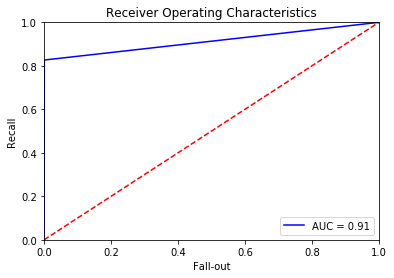

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

lbt = LabelBinarizer()
lbp = LabelBinarizer()
ytb = lbt.fit_transform(y_test)
y_test_binary = ytb.reshape(ytb.shape[0],)
pb = lbp.fit_transform(prediction)
prediction_binary = pb.reshape(pb.shape[0],)

false_positive_rate, recall, threshold = roc_curve(y_test_binary, prediction_binary)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristics')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.axis([0.0, 1.0, 0.0, 1.0])
plt.xlabel('Fall-out')
plt.ylabel('Recall')
plt.show()

## Tuning models with grid search

Hyperparameters are parameters of the model that are not learned. For example, hyperparameters of our logistic regression SMS classifier include the value of the regularization term and thresholds used to remove words that appear too frequently or infrequently. In scikit-learn models use default which are good for start but can certainly be optimized. 

Grid search is a common method to select the hyperparameter values
that produce the best model. Grid search takes a set of possible values for each hyperparameter that should be tuned, and evaluates a model trained on each element of the Cartesian product of the sets. That is, grid search is an exhaustive search that trains and evaluates a model for each possible combination of the hyperparameter values supplied by the developer.

scikit-learn has a feature `GridSearchCV()`to find better parameter values

In [96]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])

parameters = {
    'vect__max_df' : (0.25, 0.5, 0.75),
    'vect__stop_words': ('english', None),
    'vect__max_features': (2500, 5000, 10000, None),
    'vect__ngram_range': ((1,1), (1,2)),
    'vect__use_idf': (True, False),
    'vect__norm': ('l1', 'l2'),
    'clf__penalty': ('l1', 'l2')
}


grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1,
                          scoring= 'accuracy', cv=3)
scores = grid_search.fit(X_train_raw, y_train)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:   49.9s finished


In [101]:
from sklearn.metrics import precision_score, recall_score

prediction_grid = grid_search.predict(X_test_raw)
glb = LabelBinarizer()
pgb  = glb.fit_transform(prediction_grid)
prediction_grid_binary = pgb.reshape(pgb.shape[0],)

print 'Best Score: %0.3f' % grid_search.best_score_
print 'Accuracy: ', accuracy_score(y_test_binary, prediction_grid_binary)
print 'Precision: ', precision_score(y_test_binary, prediction_grid_binary)
print 'Recall: ', recall_score(y_test_binary, prediction_grid_binary)

Best Score: 0.967
Accuracy:  0.979181622398
Precision:  0.987012987013
Recall:  0.849162011173


# Multi-class Classification

In many classification problems, however, there are more than two classes that are of interest. We might wish to predict the genres of songs from samples of audio, or classify images of galaxies by their types. The goal of multi-class classification
is to assign an instance to one of the set of classes. scikit-learn uses a strategy called one-vs.-all, or one-vs.-the-rest, to support multi-class classification. Onevs.-all
classification uses one binary classifier for each of the possible classes. The class that is predicted with the greatest confidence is assigned to the instance.
LogisticRegression supports multi-class classification using the one-versus-all strategy out of the box. Let's use `LogisticRegression` for a multi-class classification problem.

In this example, we will classify the sentiments of phrases taken from movie reviews in the Rotten Tomatoes data set. Each phrase can be classified as one of the following sentiments: negative, somewhat negative, neutral, somewhat positive, or positive.

In [108]:
import pandas as pd
df_train = pd.read_csv('train.tsv', delimiter='\t',header=0)
print df_train['Phrase'].head()

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
Name: Phrase, dtype: object


#### Analysing data

In [109]:
df_train.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [110]:
df_train['Sentiment'].describe()

count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64

In [111]:
df_train['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [112]:
df_train['Sentiment'].value_counts()/df_train['Sentiment'].count()

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

The most common class, Neutral, includes more than 50 percent of the instances. Accuracy will not be an informative performance measure for this problem, as a degenerate classifier that predicts only Neutral can obtain an accuracy near 0.5.
Approximately one quarter of the reviews are positive or somewhat positive, and approximately one fifth of the reviews are negative or somewhat negative.

In [126]:
X_train, X_test, y_train, y_test = train_test_split(df_train['Phrase'],
                                                   df_train['Sentiment'])

pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])

parameters = {
    'vect__max_df': (0.25, 0.5),
    'vect__ngram_range': ((1,1), (1,2)),
    'vect__use_idf': (True, False),
    'clf__C': (0.1, 1, 10)
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': ((1, 1), (1, 2)), 'vect__use_idf': (True, False), 'clf__C': (0.1, 1, 10), 'vect__max_df': (0.25, 0.5)},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [125]:
print 'Best Score: ', grid_search.best_score_
print 'Best Parameter set:'
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print param_name, ':', best_parameters[param_name]

Best Score:  0.636814900252
Best Parameter set:
clf__C : 10
vect__max_df : 0.25
vect__ngram_range : (1, 2)
vect__use_idf : False


### Multi-class Perfoemance Metrics

As with binary classification, confusion matrices are useful for visualizing the types of errors made by the classifier. Precision, recall, and F1 score can be computed for each of the classes, and accuracy for all of the predictions can also be calculated.

In [130]:
from sklearn.metrics import precision_recall_fscore_support
prediction_multi = grid_search.predict(X_test)
mets= precision_recall_fscore_support(y_test, prediction_multi)

In [131]:
print 'Precison: %.2f' %mets[0].mean()
print 'Recall: %.2f' %mets[1].mean()
print 'F1 score: %.2f' %mets[2].mean()

Precison: 0.58
Recall: 0.51
F1 score: 0.54


Here we use `precision_recall_fscore_support` as a method for evaluating all three metrics in a single command.

[[  624   905   260    34     3]
 [  466  3284  2807   211     6]
 [  108  1550 16420  1682    72]
 [    8   179  3133  4346   602]
 [    3    16   213  1252   831]]


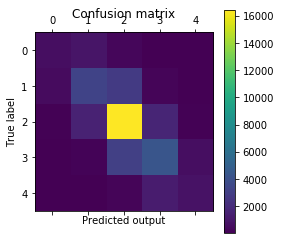

In [135]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
confusion_mat = confusion_matrix(y_test, prediction_multi)
print confusion_mat
plt.matshow(confusion_mat)
plt.title('Confusion matrix')
plt.xlabel('Predicted output')
plt.ylabel('True label')
plt.colorbar()
plt.show()

# Important References